In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Data

In [29]:
df = pd.read_csv("/Users/joshsteinbecker/jts_project/Data/Structural Biology/Amino Acids/AminoAcid_Data.csv")
print(df.columns)

Index(['letter', 'three letter code', 'full name', 'R', 'Rank', 'mass: gly',
       'composition', 'average mass', 'c', 'h', 'n', 'basic', 'Hydrophobic',
       'Polar'],
      dtype='object')


In [59]:
df['name_len'] = [len(x) for x in df['full name']]
mass = df['average mass']
df


,letter,three letter code,full name,R,Rank,mass: gly,composition,average mass,basic,Hydrophobic,Polar,name_len,nitr,oxy,carb,sulp
0,W,Trp,Tryptophan,NaN,1 (rank),3.3x Gly,C11H10N2O,186.21,NaN,HP,NaN,10,[N2],[O],[C11],[]
1,Y,Tyr,Tyrosine,-Ph-OH,2 (rank),2.9x Gly,C9H9NO2,163.17,NaN,NaN,P,8,[N],[O2],[C9],[]
2,R,Arg,Arginine,NaN,3 (rank),2.7x Gly,C6H12N4O,156.19,B,NaN,NaN,8,[N4],[O],[C6],[]
3,F,Phe,Phenylalanine,NaN,4 (rank),2.6x Gly,C9H9NO,147.18,NaN,HP,NaN,13,[N],[O],[C9],[]
4,H,His,Histidine,NaN,5 (rank),2.4x Gly,C6H7N3O,137.14,B,NaN,NaN,9,[N3],[O],[C6],[]
5,M,Met,Methionine,NaN,6 (rank),2.3x Gly,C5H9NOS,131.20,NaN,HP,NaN,10,[N],[O],[C5],[S]
6,E,Glu,Glutamic Acid,NaN,7 (rank),2.3x Gly,C5H7NO3,129.12,A,NaN,NaN,13,[N],[O3],[C5],[]
7,K,Lys,Lysine,NaN,8 (rank),2.2x Gly,C6H12N2O,128.17,B,NaN,NaN,6,[N2],[O],[C6],[]
9,D,Asp,Aspartic Acid,NaN,10 (rank),2.0x Gly,C4H5NO3,115.09,A,NaN,NaN,13,[N],[O3],[C4],[]
10,N,Asn,Asparagine,NaN,11 (rank),2.0x Gly,C4H6N2O2,114.10,NaN,NaN,NaN,10,[N2],[O2],[C4],[]


In [31]:
xyline = np.linspace(min(df.name_len),max(df.name_len),int(max(mass)))
# xyline is a line that bisects the xy plane across the x=y coords

# Section: Meaningless Correlations
With the provided dataset, draw a correlation that has no use or causal relationships with each other.

## Mass vs Name Length of amino acids

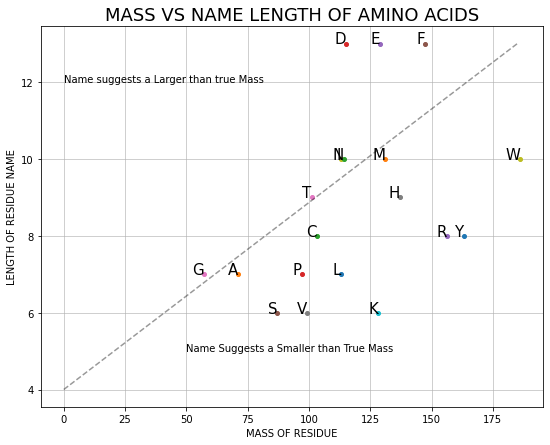

In [53]:
plt.figure(figsize=(9,7))
plt.grid(linewidth = 0.6)
# plt.scatter(mass,nlen, c=df["letter"])
groups = df.groupby("letter")
for name, group in groups:
    plt.plot(group["average mass"],group["name_len"], marker="o", linestyle="", label=name,markersize=4)
    plt.annotate(name,(group["average mass"],group["name_len"]),fontsize=15,ha='right')
# for x,y in zip(df["average mass"],df["nlen"]):
#    label = f'{df["letter"]}'
#    plt.annotate(label,(df['average mass'],df['nlen']))
#plt.legend()
plt.plot(xyline,linestyle='--',color='black',alpha=0.4)
plt.xlabel('MASS OF RESIDUE')
plt.ylabel('LENGTH OF RESIDUE NAME')
plt.annotate('Name Suggests a Smaller than True Mass',(50,5))
plt.annotate('Name suggests a Larger than true Mass',(0,12))
plt.title('MASS VS NAME LENGTH OF AMINO ACIDS',fontsize=18)
plt.show()

In [86]:
df['nitr'] = df['composition'].str.findall('N\d*\d*')
df['oxy'] = df['composition'].str.findall('O\d*\d*')
df['carb'] = df['composition'].str.findall('C\d*\d*')
df['sulp'] = df['composition'].str.findall('S\d*\d*')

In [103]:
avg = [int(x/12) for x in df['average mass'][0:19]]
avg

[15, 13, 13, 12, 11, 10, 10, 10, 9, 9, 9, 9, 8, 8, 8, 8, 7, 5, 4]

# Amino Acids by Mass

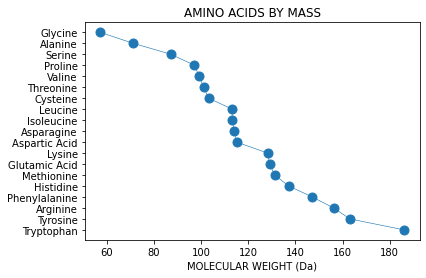

In [106]:
plt.plot(df['average mass'],df['full name'],marker = 'o',markersize = 9,linewidth=0.6)
   # help~ variable marker size?
plt.xlabel("MOLECULAR WEIGHT (Da)")
plt.title("AMINO ACIDS BY MASS")
plt.show()